In [1]:
#Importing Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

In [17]:
#Developing dataframes to form input(X_train) and output(y_train) required for the ANN model
df = pd.read_csv("Nasa Battery Data\Battery 5\Discharge cycle\Padded and Resampled\InputData.csv")
X_train = df.drop(columns=['y'])
y_train = df.T.tail(1).T
train_X = X_train.to_numpy()
train_y = y_train.to_numpy()
#Scaling
scaler = MinMaxScaler()
train_Xn = scaler.fit_transform(train_X)
train_yn = scaler.fit_transform(train_y)
df

,y
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834645
...,...
150,1.293464
151,1.288003
152,1.287453
153,1.309015


In [111]:
#Reshaping
train_Xn = train_Xn.reshape(9, 1, 33)
train_Xn.shape[2]

33

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1,33), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(train_yn.shape[1]))

model.compile(optimizer='adam', loss='mse',metrics = 'accuracy')
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 1, 64)             25088     
                                                                 
 lstm_26 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 37,537
Trainable params: 37,537
Non-trainable params: 0
_________________________________________________________________


In [113]:
#fitting the model to X_train and y_train dataset, and 100 epochs and saving it into history
history = model.fit(train_Xn,train_yn, epochs=100,batch_size=5)

Epoch 1/100
2/2 [==============================] - 2s 8ms/step - loss: 0.4949 - accuracy: 0.1111
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 0.4831 - accuracy: 0.1111
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 0.4631 - accuracy: 0.1111 
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 0.4375 - accuracy: 0.1111
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 0.4216 - accuracy: 0.1111
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 0.4116 - accuracy: 0.1111 
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 0.3853 - accuracy: 0.1111
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 0.3543 - accuracy: 0.1111 
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 0.3382 - accuracy: 0.1111
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 0.3131 - accuracy: 0.1111
Epoch 11/100
2/2 [============

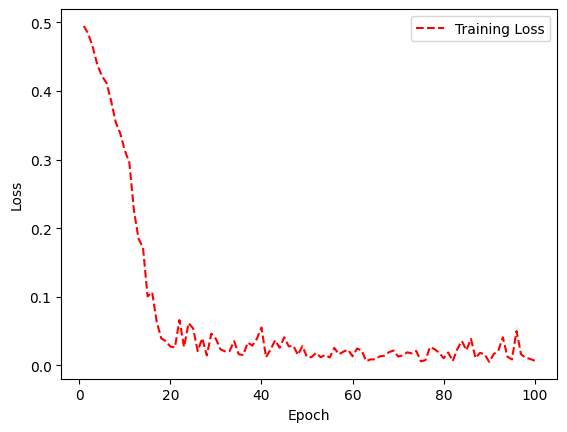

In [114]:
# Using function to get loss history
training_loss = history.history['loss']

# Code for counting the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [101]:
#Using the predict function using the X_train data to obtain y_pred(1024,2) 
#(with 1st column with predicted values of y1 and 2nd column with predicted values of y2)
y_pred = model.predict(train_Xn)
yd_pred = scaler.inverse_transform(y_pred)
print(yd_pred)
print(train_y)


1/1 [==============================] - 0s 258ms/step
[[0.9240092 ]
 [0.9127265 ]
 [0.91701955]
 [0.9085879 ]
 [0.8491807 ]
 [0.75822455]
 [0.71792054]
 [0.6772363 ]
 [0.6471161 ]]
[[0.92824371]
 [0.92316362]
 [0.91230663]
 [0.90230495]
 [0.84245145]
 [0.76426263]
 [0.71669795]
 [0.67735196]
 [0.64673181]]


In [102]:
from sklearn.metrics import mean_absolute_error
print('MSE for y: %.3f' % mean_absolute_error(train_yn, yd_pred))

MSE for y: 0.261


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(train_y, y_pred)